# Offshore Viz Data Exploration

## Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Read Data Source

#### Base File

In [2]:
base_file = pd.read_csv('Data/offshore_agg_data_alltime.csv')
base_file.head()

,c_n_sourceID,c_type,c_n_countries_norm,b_n_jurisdiction_description_norm,count
0,Bahamas Leaks,individual,Angola,Bahamas,1
1,Panama Papers,individual,Lithuania,Seychelles,1
2,Panama Papers,individual,Lithuania,Samoa,1
3,Panama Papers,individual,Liechtenstein,British Anguilla,1
4,Panama Papers,individual,Libya,Panama,1


#### Country File

In [68]:
def format_file(country_file):
    country = country_file.iloc[1,0]
    country_file = country_file.drop(country_file.index[[0,1,2,7,8,9,10]])
    rest = pd.DataFrame([[country_file.iloc[1,3],country_file.iloc[1,4]],[country_file.iloc[2,3],country_file.iloc[2,4]],[country_file.iloc[3,3],country_file.iloc[3,4]]])
    country_file.columns = [1,2,3,4,5,6]
    country_file = country_file.drop([3,4,5,6], axis=1)
    rest.columns=[1,2]
    country_file = pd.concat([country_file, rest], axis=0)
    country_file.columns = ['Attributes','Values']
    country_file['Attributes'] = country_file['Attributes'].apply(lambda x: x.replace(':',""))
    country_file = country_file.append(pd.DataFrame([['Country',country]], columns=country_file.columns))
    country_dataframe = pd.DataFrame([list(country_file.iloc[:,1])],columns=list(country_file.iloc[:,0]))
    return country_dataframe

directory = 'Data/'
country_file = pd.DataFrame([])
for filename in os.listdir(directory):
    if 'csv' not in filename:
        if country_file.empty:
            country_file = pd.read_excel(os.path.join(directory, filename))
            country_file = format_file(country_file)
        else:
            country_file = pd.concat([country_file, format_file(pd.read_excel(os.path.join(directory, filename)))], axis=0)
    

country_file


,Ranking,Banding,Master-index Score,Number of Sources,Type Of Governance,Government Effectiveness,Civil Liberties & Political Rights,Freedom Of The Press,Freedom Of Religion,Political Stability,...,Corruption,Absence Of Violence,Arms Export Controls,Counterfeiting,Exploitative Labor,Natural Resources Industry Controls,Political,Economic,Criminal,Country
0,7 / 247 Countries,VERY LOW,9.638485,252,1.490284,1.801270,1.322267,1.625656,-0.414714,1.562173,...,1.903795,1.716715,0.275612,0.129254,0.173210,1.441943,1.454697,0.930744,0.589927,SWITZERLAND
0,211 / 247 Countries,HIGH,2.007872,266,-0.774760,-0.134294,-1.443132,-1.933534,-1.483291,-0.256945,...,-0.043698,-0.401358,-1.160592,-9.438460,-1.861874,1.441943,-0.665023,0.291194,-1.112536,CHINA
0,18 / 247 Countries,VERY LOW,9.180565,266,1.431423,1.234093,1.322267,0.753376,0.895499,1.092128,...,1.677914,0.580815,1.370331,-0.123337,0.173210,0.470139,1.147524,0.917150,0.205168,UNITED KINGDOM
0,46 / 247 Countries,LOW,8.218161,238,0.849669,1.186499,0.038105,0.212651,0.000000,1.523018,...,1.429103,0.000000,0.000000,-7.072051,0.173210,-0.716602,0.891202,0.734665,-0.203397,HONG KONG
0,151 / 247 Countries,MEDIUM,4.263150,272,0.280603,-0.206640,-0.031381,-0.155029,-1.483291,-0.223280,...,-0.185633,0.428744,-0.096287,0.054895,-0.452386,1.140016,-0.346707,0.139005,-0.031069,INDONESIA
0,93 / 247 Countries,MEDIUM,5.828538,268,0.017899,0.302185,-0.334860,-0.645724,-1.483291,0.673813,...,0.324708,0.957086,-1.160592,-0.616274,-0.342880,1.441943,-0.041555,0.477881,-0.030735,MALAYSIA
0,180 / 247 Countries,HIGH,3.196633,270,-0.882874,-0.405184,-1.443132,-0.998070,-1.483291,-0.611220,...,-0.664683,-1.726482,0.011047,0.083705,-0.456928,1.441943,-0.567387,0.126431,-0.287016,RUSSIAN FEDERATION
0,16 / 247 Countries,VERY LOW,9.213660,254,0.205886,1.581766,-0.334860,-0.703330,-0.414714,1.872194,...,1.899007,1.237785,-0.136488,-0.180649,0.173210,1.441943,0.986649,0.891002,0.523077,SINGAPORE
0,27 / 247 Countries,LOW,8.943269,211,1.498484,1.582729,1.322267,0.687832,0.895499,0.899935,...,0.845345,0.590500,-1.087872,0.118498,0.173210,1.441943,1.137364,0.515402,0.370106,TAIWAN
0,112 / 247 Countries,MEDIUM,5.171483,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.105770,0.173210,-0.716602,0.000000,0.149746,-0.077094,UNITED STATES MINOR OUTLYING ISLANDS


## Data Preprocessing

#### Change Column Names

In [24]:
base_file.columns = ['Source','Type','Country','Offshore_Location','Count']

#### Aggregate Data

In [25]:
base_file_pro = pd.DataFrame([])
for name, group in base_file.groupby(['Country','Offshore_Location']):
    base_file_pro = base_file_pro.append([list(name + (group['Count'].sum(),))])
base_file_pro.columns=['Country','Offshore_Location','Count']
base_file_pro.head()

,Country,Offshore_Location,Count
0,Albania,Bahamas,1
0,Albania,British Anguilla,4
0,Albania,British Virgin Islands,13
0,Albania,Cayman Islands,3
0,Albania,Jersey,1


## Data Exploration

#### Simple Count

In [38]:
print("Countries: %d\n" %len(base_file_pro.Country.unique()))
print("Offshore_Locations: %d\n" %len(base_file_pro.Offshore_Location.unique()))
print(base_file_pro.Count.describe())

Countries: 185

Offshore_Locations: 38

count     1432.000000
mean        99.358939
std        798.363523
min          1.000000
25%          2.000000
50%          5.000000
75%         21.000000
max      18349.000000
Name: Count, dtype: float64


#### Pivot Table

In [31]:
pd.pivot_table(base_file_pro, values='Count', index=['Country'],columns=['Offshore_Location']).fillna(0).head()

Offshore_Location,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman Islands,Cook Islands,Costa Rica,Cyprus,...,Saint Kitts and Nevis,Samoa,Seychelles,Singapore,St. Lucia,State of Delaware,United Kingdom,United States Of America,Vanuatu,Wyoming
Country,,,,,,,,,,,,,,,,,,,,,
Albania,1.0,0.0,0.0,4.0,13.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,1.0,2.0,2.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,3.0,0.0,0.0,0.0,13.0,0.0,2.0,2.0,0.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,1.0,0.0,0.0,3.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Bar Chart

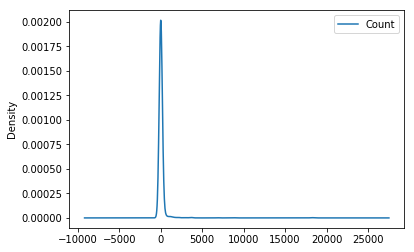

In [43]:
base_file_pro.plot.kde()
plt.show()